In [161]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
import random
from cfae import Simple_CF_Ascent

%load_ext autoreload
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Counterfactual-Ascent workspace

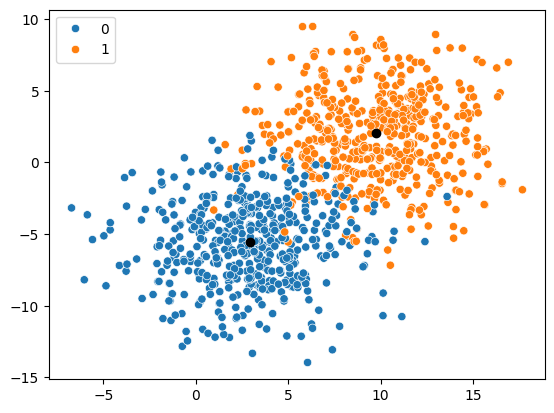

In [162]:
X, y, centers = make_blobs(centers=2, cluster_std=3, n_features=2, n_samples=1000, return_centers=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.scatter(x=centers[0][0], y=centers[0][1],color="black")
plt.scatter(x=centers[1][0], y=centers[1][1],color="black")

In [163]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,label
0,11.173864,-0.972820,1.0
1,5.744305,-8.293034,0.0
2,14.803100,-2.197846,1.0
3,7.710412,-0.281479,1.0
4,11.580306,7.287103,1.0
...,...,...,...
995,12.210993,4.902223,1.0
996,1.722586,-5.534222,0.0
997,3.155178,-6.218997,0.0
998,11.566517,-3.647238,1.0


In [ ]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers)

Generation counterfacutal from cluster: 0.0 , Into cluster: 1.0
Amount of changes:  16
Number of changed features: 2


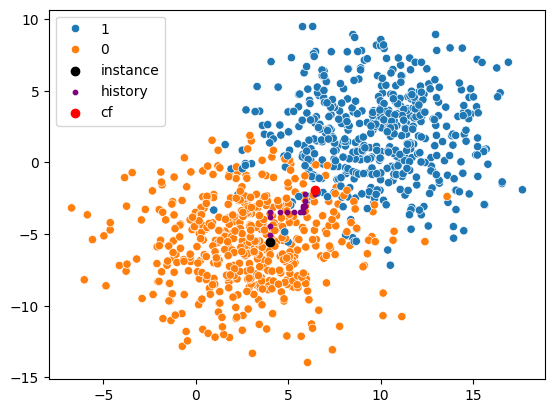

In [171]:
hx = list(zip(*h))[0]
hy = list(zip(*h))[1]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred)
plt.scatter(x=x[0],y=x[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf[0],y=cf[1],color='red', label='cf')
plt.legend()

## PCA attempt

<Axes: >

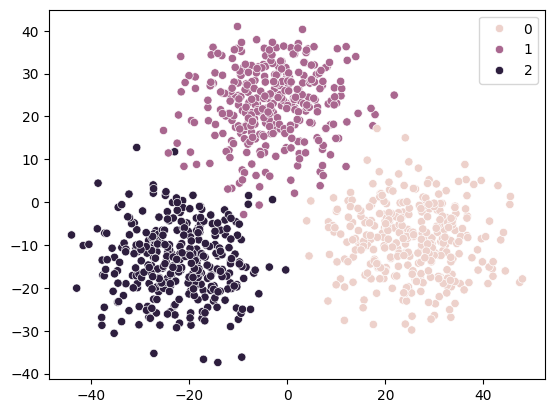

In [156]:
X, y, centers = make_blobs(centers=3, cluster_std=8, n_features=25, n_samples=1000, return_centers=True)

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y)

In [157]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,label
0,-10.347079,1.620950,-8.096302,-11.498216,-8.725516,-6.113524,-33.639415,6.708564,1.266872,-7.774719,...,-0.510742,-1.290565,20.682259,-20.118994,-11.548452,-3.519001,5.214637,12.258931,2.063852,1.0
1,21.767124,-0.521269,7.689453,7.112021,8.214289,10.352559,-1.260728,3.631012,-17.250320,-6.010035,...,-6.935031,0.485307,6.907858,4.914870,-3.087260,6.752872,13.270555,4.203647,7.138637,2.0
2,9.175137,0.902453,4.121846,9.927929,2.106924,8.999475,-11.105700,5.121304,-3.744169,-16.479415,...,-15.983911,-4.638724,5.295664,-25.862535,11.329019,-0.553887,7.794892,1.011195,2.549184,2.0
3,-6.476045,-5.737458,-10.032645,-0.186913,7.896457,-1.907639,-5.807102,18.011882,-0.890881,-4.188886,...,-0.652095,11.503160,3.766250,4.312441,11.942297,-2.007029,9.461410,10.721175,1.398881,1.0
4,-12.821078,15.111638,1.377695,0.108811,-11.922306,12.498939,10.888551,5.004790,19.556784,-0.423213,...,19.108897,1.555501,2.166834,15.066082,6.396406,-6.568852,-7.387375,-12.417854,-1.779747,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-7.865966,10.029583,-1.961733,-11.368796,0.485170,-20.930602,-0.394362,-1.575641,-12.810174,-15.722988,...,2.909425,2.507920,-2.605557,-3.200973,-19.959782,5.438159,19.997044,4.586664,-1.568045,1.0
996,3.460449,-4.501748,3.839077,1.062348,-5.004449,0.407863,-2.409626,-0.371495,8.282355,-2.141749,...,5.775500,-3.692472,-7.967089,13.834448,1.716809,0.274569,10.160813,-2.803196,0.656535,0.0
997,-12.964602,13.498403,-13.776482,-12.495968,12.416520,-10.352362,13.024914,-6.216221,9.540813,3.101849,...,2.356086,0.683503,-2.911850,5.949428,6.976914,-19.721623,-7.903160,14.113280,-8.130937,0.0
998,6.264062,4.064828,-7.711650,16.710415,15.951721,-0.831382,4.399734,8.591610,7.005737,-9.280673,...,-4.724635,0.172026,-5.412707,-15.998451,1.080129,6.150642,19.486404,-1.053562,-6.552139,2.0


In [158]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers)

Generation counterfacutal from cluster: 2.0 , Into cluster: 1.0
Amount of changes:  0
Number of changed features: 0


In [159]:
cf_pca = pca.transform([cf])[0]

h_pca = pca.transform(h)

hx = list(zip(*h_pca))[0]
hy = list(zip(*h_pca))[1]

x_pca = pca.transform([x])[0]

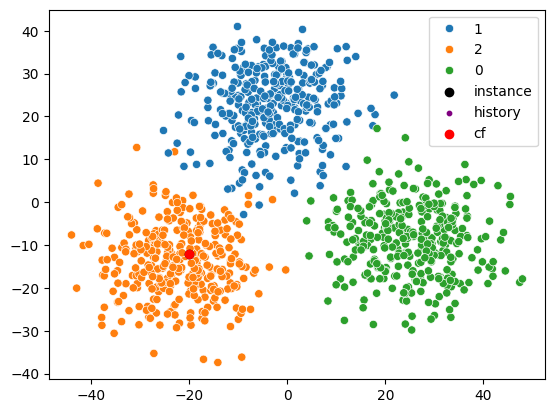

In [160]:

sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=pred)
plt.scatter(x=x_pca[0],y=x_pca[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf_pca[0],y=cf_pca[1],color='red', label='cf')
plt.legend()